In [1]:
%load_ext autoreload
%autoreload 2
import random
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_NQueens, plot_evolution

In [2]:
from abc import ABC, abstractmethod
class GAProblem(ABC):
    @abstractmethod
    def init_population(self, pop_size): pass

    @abstractmethod
    def fitness(self, sample): pass

    @abstractmethod
    def reproduce(self, population): pass

    @abstractmethod
    def replacement(self, old, new): pass

In [3]:
class NQueensProblem(GAProblem):
    def __init__(self, n):
        self.n = n
        self.max_fitness = n*(n-1)//2  # max number if non-attacking pairs
        self.alphabet = list(np.arange(n))

    def init_population(self, pop_size):
        # TODO:alomost the same as the previous problem.
        population = []
        for _ in range(pop_size):
            new_individual = list(np.random.randint(self.n, size=(self.n)))
            population.append(new_individual)
        return population

    def fitness(self, queens):
        """
        TODO
        hint: count the non-attacking pairs
        """
        def checkNonAttack(queen1, queen2):
            (col1, row1), (col2, row2) = queen1, queen2
            if row1 == row2 or abs(col2 - col1) == abs(row2 - row1):
                return False
            return True

        cnt = 0
        for i in range(len(queens)):
            for j in range(i + 1, len(queens)):
                queen1 = (i, queens[i]) # 第i列的第queen[i]行
                queen2 = (j, queens[j])
                if checkNonAttack(queen1, queen2):
                    cnt += 1
        return cnt
        

    def reproduce(self, population, mutation_rate):
        # TODO:alomost the same as the previous problem.
        def select(r, population, fitness):
            """
            TODO: select *r* samples from *population*
            the simplest choice is to sample from *population* with each individual weighted by its fitness
            """
            return_list = []

            population_fitness = []
            for individual in population:
                population_fitness.append(fitness(individual))

            threshold = 0
            threshold_list = []
            fit_sum = sum(population_fitness)
            for i in population_fitness:
                threshold_list.append(threshold)
                threshold += i / fit_sum
            threshold_list.append(1)
            
            for _ in range(r):
                temp = random.randrange(0, 10) / 10
                # print(temp)
                for i in range(len(population)):
                    if temp >= threshold_list[i] and temp <= threshold_list[i + 1]:
                        return_list.append(population[i])
                        break
            return return_list

        def recombine(x, y):
            """
            TODO: combine two parents to produce an offspring
            """
            cut_off = random.randrange(0, self.n)
            return x[:cut_off] + y[cut_off:]
            
        def mutate(x, gene_pool, pmut):
            """
            apply mutation to *x* by randomly replacing one of its gene from *gene_pool*
            """
            if random.uniform(0, 1) >= pmut:
                return x

            n = len(x)
            g = len(gene_pool)
            c = random.randrange(0, n)
            r = random.randrange(0, g)

            new_gene = gene_pool[r]
            return x[:c] + [new_gene] + x[c + 1:]

        return_list = []
        for i in range(len(population)):
            return_list.append(mutate(\
                        recombine(*select(2, population, self.fitness)), \
                        self.alphabet, mutation_rate))
        return return_list

    def replacement(self, old, new, fitness):
        """
        You can use your own strategy, for example retain some solutions from the old population
        """
        All = old + new
        All = sorted(All, key=lambda t: -fitness(t))
        return All[:len(old)]

    def __repr__(self):
        return f"{self.n}-Queens Problem"


In [4]:
def genetic_algorithm(
    problem: GAProblem,
    ngen, n_init_size, mutation_rate,
    log_intervel=100
):

    population = problem.init_population(n_init_size)
    best = max(population, key=problem.fitness)
    history = [(0, list(map(problem.fitness, population)))]

    for gen in range(ngen):
        next_gen = problem.reproduce(population, mutation_rate)
        population = problem.replacement(population, next_gen, problem.fitness)

        if gen % log_intervel == 0:
            current_best = max(population, key=problem.fitness)
            if problem.fitness(current_best) > problem.fitness(best):
                best = current_best
            print(
                f"Generation: {gen}/{ngen},\tBest: {best},\tFitness={problem.fitness(best)}")
            history.append((gen, list(map(problem.fitness, population))))

    history.append((ngen-1, list(map(problem.fitness, population))))
    return best, history

In [5]:
def genetic_algorithm_to_goal(
    problem: GAProblem,
    goal, n_init_size, mutation_rate,
    log_intervel=100
):

    population = problem.init_population(n_init_size)
    best = max(population, key=problem.fitness)
    history = [(0, list(map(problem.fitness, population)))]

    gen = 0
    while problem.fitness(best) < goal:
        next_gen = problem.reproduce(population, mutation_rate)
        population = problem.replacement(population, next_gen, problem.fitness)

        if gen % log_intervel == 0:
            current_best = max(population, key=problem.fitness)
            if problem.fitness(current_best) > problem.fitness(best):
                best = current_best
            print(
                f"Generation: {gen}, \tBest: {best},\tFitness={problem.fitness(best)}")
            history.append((gen, list(map(problem.fitness, population))))
        gen += 1

    history.append((gen-1, list(map(problem.fitness, population))))
    return best, history

In [6]:
ngen = 2000
init_size = 20
mutation_rate = 0.8

n = 8
problem = NQueensProblem(n)
goal = problem.max_fitness
# solution, history = genetic_algorithm(problem, ngen, init_size, mutation_rate)
solution, history = genetic_algorithm_to_goal(problem, goal, init_size, mutation_rate)


Generation: 0, 	Best: [5, 4, 2, 7, 3, 1, 2, 0],	Fitness=24
Generation: 100, 	Best: [6, 2, 0, 5, 7, 4, 1, 3],	Fitness=28


e:\lessons\lessons\2022_autumn\CS303-AI\Week8\Practice7\utils.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


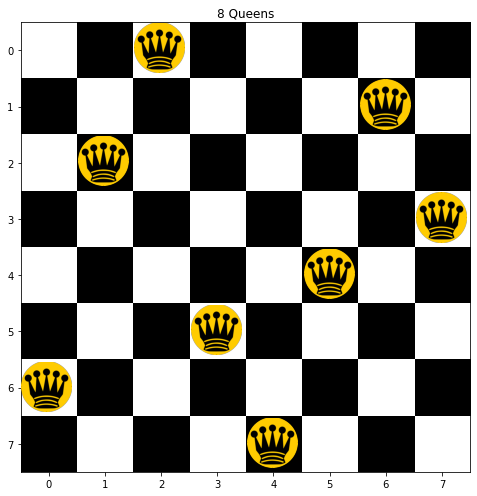

In [7]:
# Example of how to use this function
# plot_NQueens([4, 2, 0, 6, 1, 7, 5, 3])
# replace the parameter with your own results
plot_NQueens(solution)
